In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

# Display the first few rows of the dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


lets load data set Bosten house pridiction


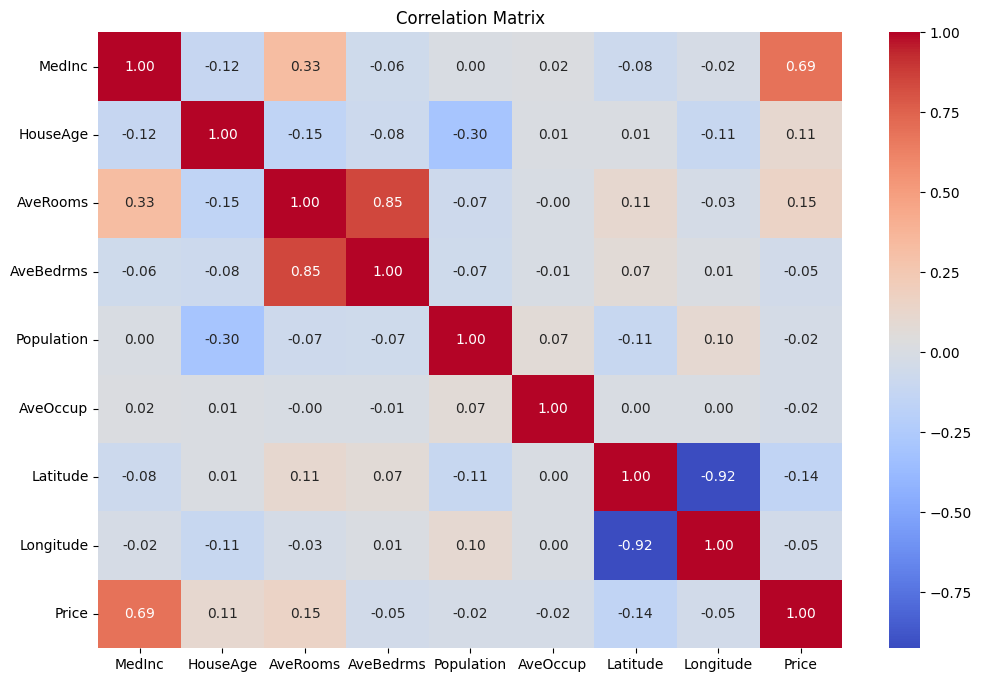

In [12]:
# Data Exploration

# Checking the shape of the dataset
df.shape

# Checking for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()

# Checking the correlation between features and the target variable
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Splitting the dataset into training and testing sets

X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Model building: Linear Regression

# Instantiate the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R-squared: 0.58


In [15]:
# Cross-validation

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive values and calculate mean and standard deviation
cv_scores = -cv_scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print cross-validation results
print(f'Cross-Validation Mean MSE: {cv_mean:.2f}')
print(f'Cross-Validation Standard Deviation: {cv_std:.2f}')



Cross-Validation Mean MSE: 0.55
Cross-Validation Standard Deviation: 0.19


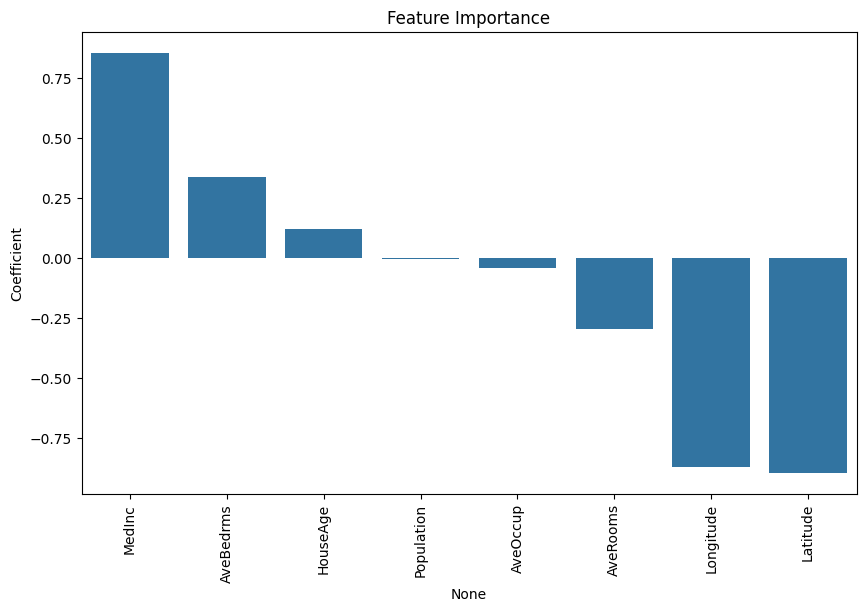

In [16]:
# Feature Importance (Coefficient Analysis)

# Getting the coefficients of the linear regression model
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])

# Sorting the coefficients to see the most important features
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


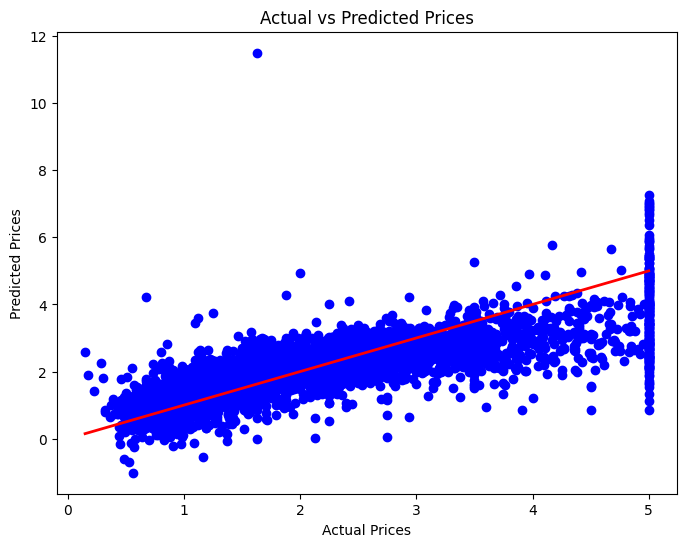

In [17]:
# Visualizing the Model's Predictions

# Plotting actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [18]:
# Conclusion and Summary

# Summary of the model's performance
print(f'R-squared score: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Cross-validation Mean MSE: {cv_mean:.2f}')
print(f'Cross-validation Standard Deviation: {cv_std:.2f}')


R-squared score: 0.58
Root Mean Squared Error (RMSE): 0.75
Cross-validation Mean MSE: 0.55
Cross-validation Standard Deviation: 0.19


pridication on new data


In [27]:
# Example feature values (these should match the feature names during training)
example_data = {
    'MedInc': 6.5,    # Median income
    'HouseAge': 15.0,  # Median house age
    'AveRooms': 6.0,   # Average number of rooms
    'AveOccup': 3.0,   # Average occupancy
    'Latitude': 37.5,  # Latitude (changed 'Lat' to 'Latitude')
    'Longitude': -122.3, # Longitude (changed 'Long' to 'Longitude')
    'AveBedrms': 4.0,   # Average bedrooms (added 'AveBedrms')
    'Population': 1500.0  # Population (added 'Population')
}

# Convert the dictionary into a DataFrame (ensure column names match)
example_df = pd.DataFrame([example_data])

# Get the feature names that the model was trained on
training_features = X_train.columns

# Ensure that example_df has the same features as the training data
# and in the same order
example_df = example_df[training_features]

# Apply the same scaler to this data point
example_scaled = scaler.transform(example_df)

# Use the trained model to make a prediction
predicted_price = lr_model.predict(example_scaled)

# Output the prediction (scaled by 100,000 if needed)
print(f"The predicted house price for the provided data point is: ${predicted_price[0] * 100000:.2f}")

The predicted house price for the provided data point is: $571826.74


Pickiling the model


In [28]:
import pickle

In [33]:
pickle.dump(lr_model,open('regmodel.pkl','wb'))

In [34]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [35]:
pickled_model.predict(example_scaled)

array([5.71826735])